In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
def mallet_heatmap(composition_file, topics_file, fig_set={"figure.figsize":(8, 6), "figure.dpi":300}, show_topics=True):
    
    """
    Uses Seaborn to create a heatmap of topics generated using MALLET topic modeling.

    Args:
        composition_file r(str): File name and directory of MALLET topic composition file. Usually NLP-MALLET_Output_Keys.csv.
        topics_file r(str): File name and directory of MALLET topic keys file. Usually NLP-MALLET_Output_Composition.csv.
        fig_set{} (rcParams): Matplotlib figure size parameters. 8in by 6in at 300 DPI by default. Warning: changing dimension values could impact readability of topics.
        show_topics (bool): Controls if topic keys should be displayed under heatmap. True by default. Useful to set as false when using many topics.

    Returns:
        heatmap (object): Seaborn heatmap plot object.
    """

    topics = pd.read_csv(topics_file, names=["Topic", "Weight", "Keys"]) # Topic keys file
    
    # Add column names to topic composition file before reading
    composition_names = ["Document ID", "Document"]
    for topic_num in range(1, len(topics.index)+1):
        composition_names.append(f"Topic {topic_num}")
    composition = pd.read_csv(composition_file, names=composition_names)
    composition.drop(["Document ID"], axis=1, inplace=True) # Drop ID, DataFrames are already indexed
    

    document_titles = composition["Document"] # Clean hyperlinks function here
    
    sns.set(rc=fig_set) # Set figure dimensions and resolution

    heatmap = sns.heatmap(composition.iloc[:, 1:-1],    # Select all columns excluding index column
                          vmin=0, vmax=1,               # Range 0-1
                          annot=True,                   # Display values inside heatmap
                          yticklabels=document_titles)  
    plt.suptitle("Topic Composition and Keys", fontsize=18) # Title 

    # Add topics to heatmap
    if show_topics:
        size = plt.gcf().get_size_inches()          # Figure dimensions to align topics under chart
        topic_num = 1
        for keys in topics["Keys"]:
            plt.text(size[1]-size[0],               # Left indent
                     size[1]+(topic_num*0.25),      # 0.25 spacing between topics
                     f"Topic {topic_num}: {keys}", 
                     ha="left")                     # Align text on left
            topic_num+=1

    return heatmap

<Axes: >

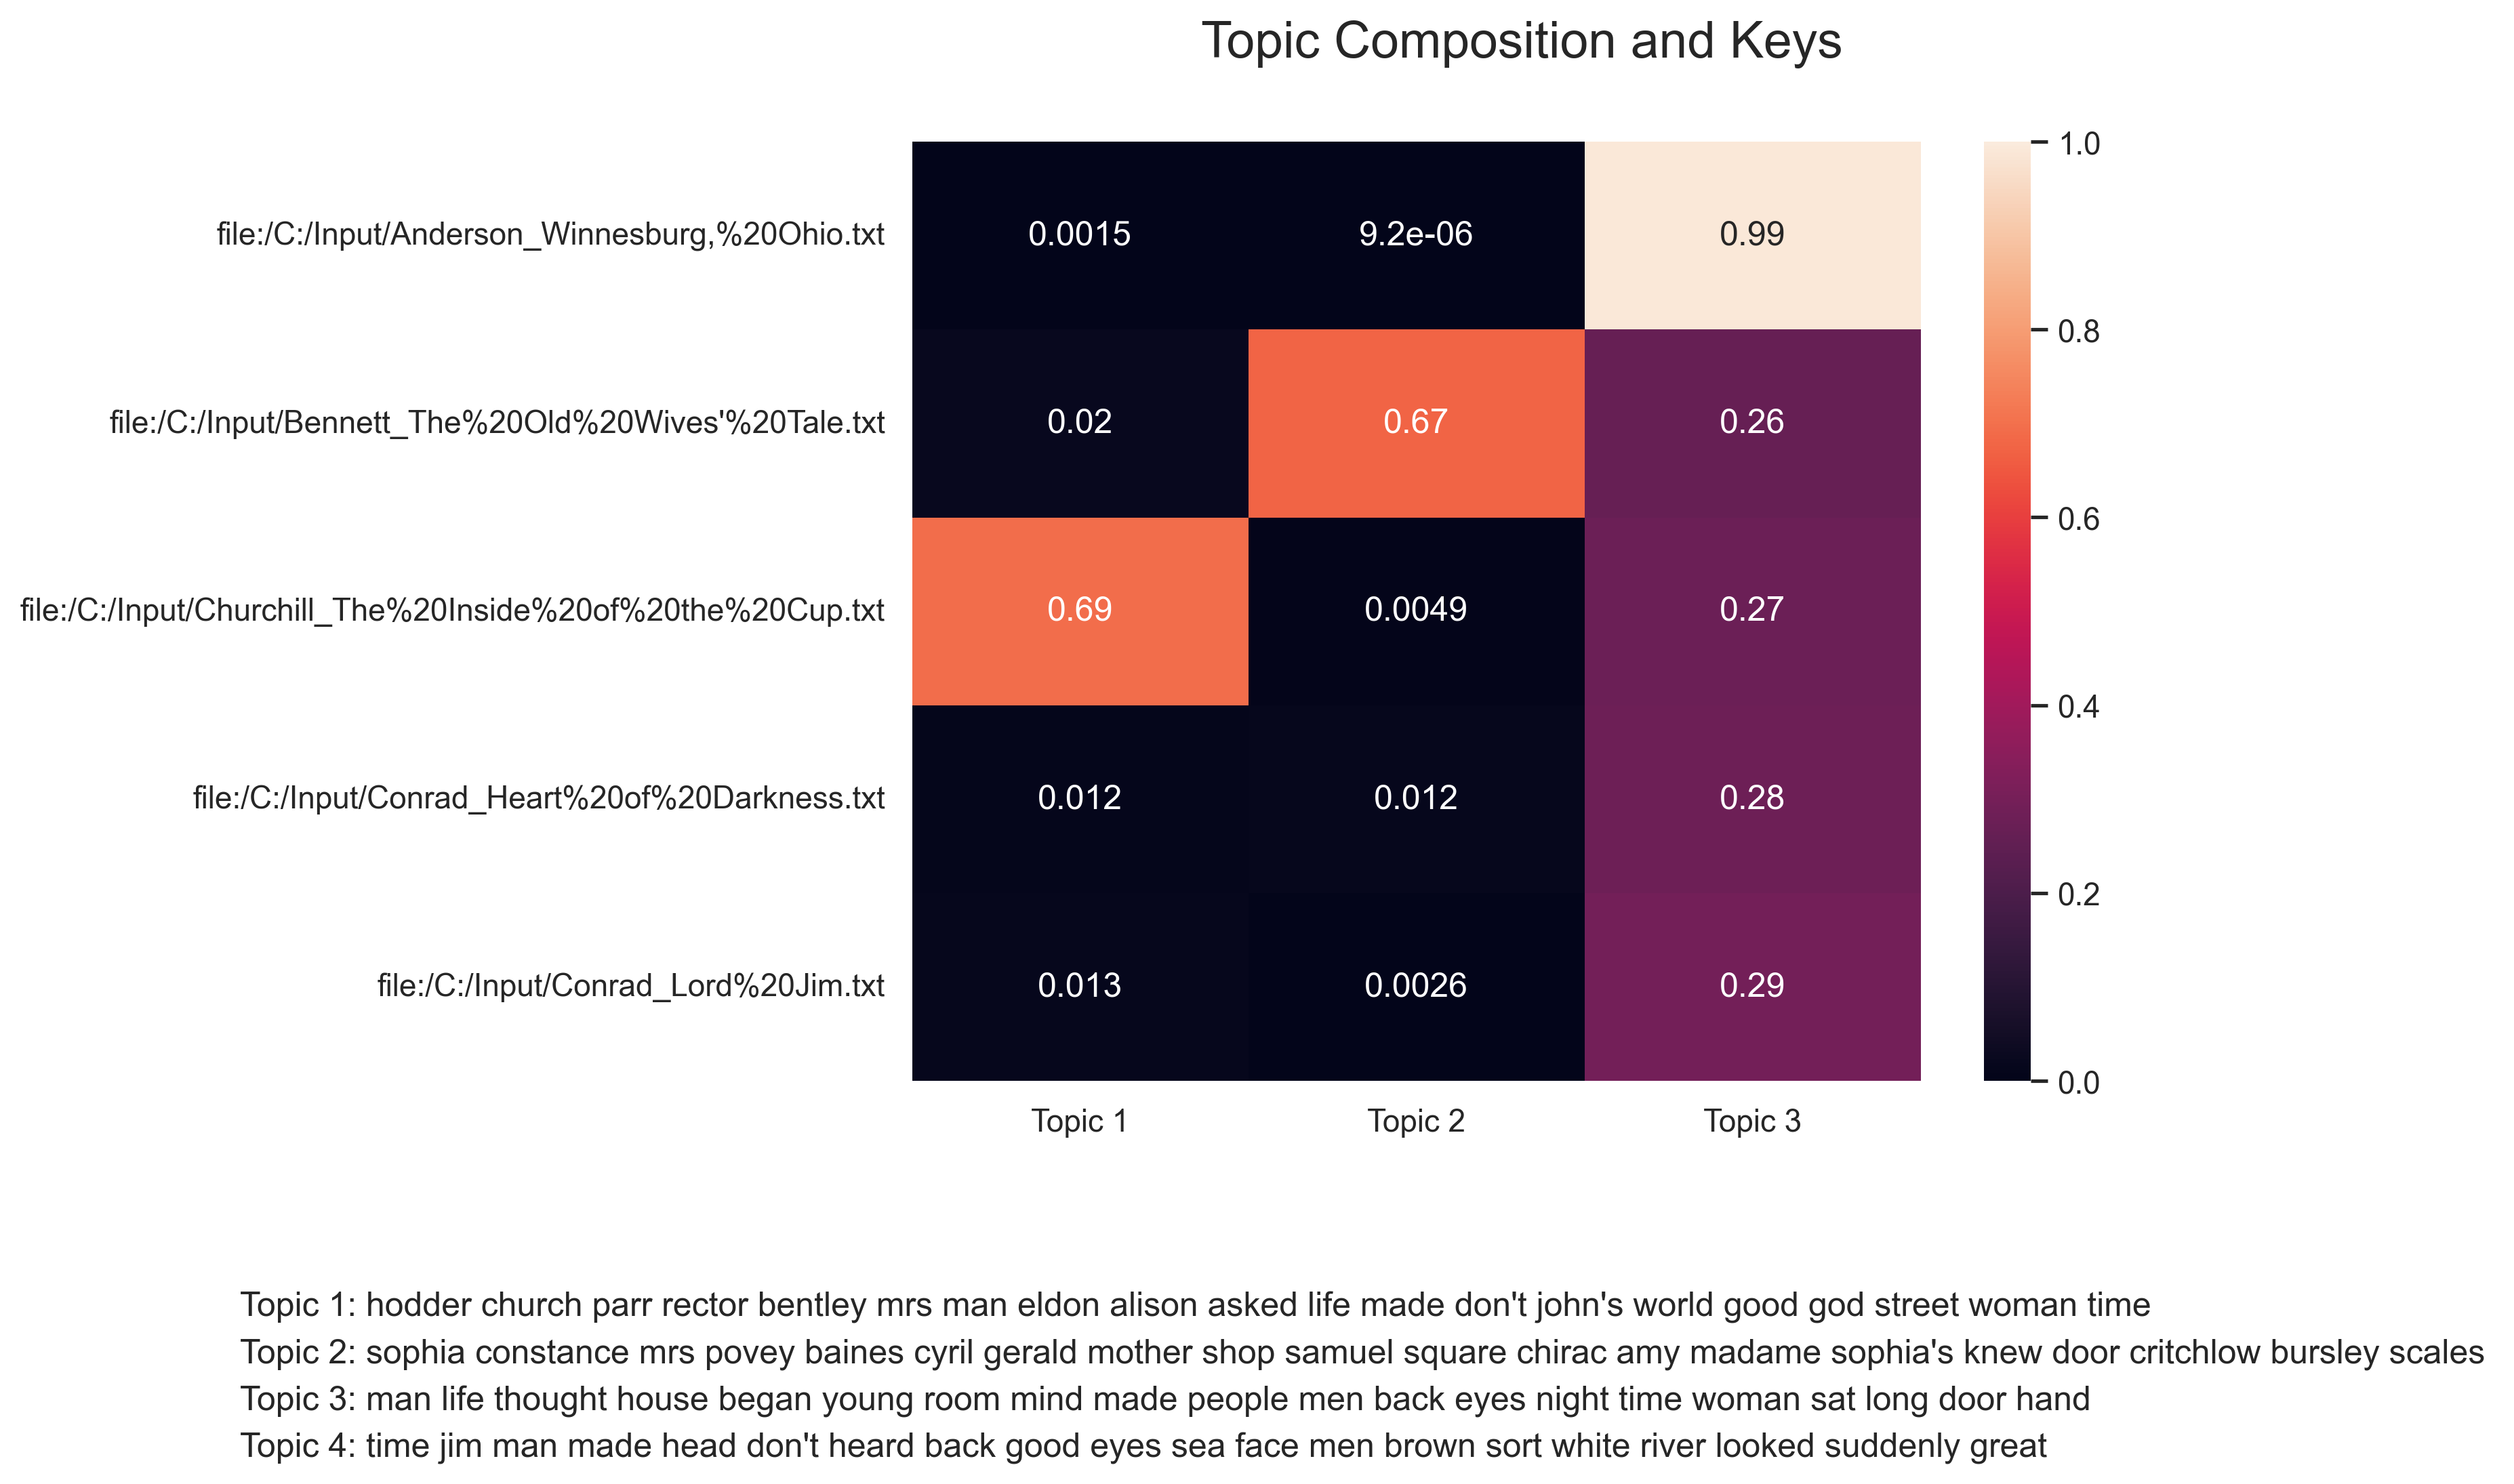

In [46]:
# Example

t = r"NLP-MALLET_Output_Keys.csv"
c = r"NLP-MALLET_Output_Composition.csv"

mallet_heatmap(c,t)